# Practice 2

### Martyna Baran, Zuzanna Jarlaczyńska

In [245]:
from sklearn.cluster import KMeans
from pandas import read_csv
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn .decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, mutual_info_score
import math 

filename = 'zoo.data'
cols =  ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toothead', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
data = pd.read_csv(filename, names=cols)

In [178]:
data.head()

,animal name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothead,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Exercise 1


In [179]:

X = data[data.columns[1:]]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)


k_values = [5, 6, 7, 8]
mean_errors = []
seeds = [10,20,30]
        
        
mean_errors = []
for k in k_values:
    errors = []
    for seed in seeds:
        kmeans = KMeans(n_clusters=k,  n_init='auto',random_state=seed)
        kmeans.fit(X_train)
        errors.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    mean_error = np.mean(errors)
    mean_errors.append(mean_error)      
    
print(mean_errors)
    


[113.64354785450364, 102.48643279545934, 97.37632245619487, 84.33894463985304]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


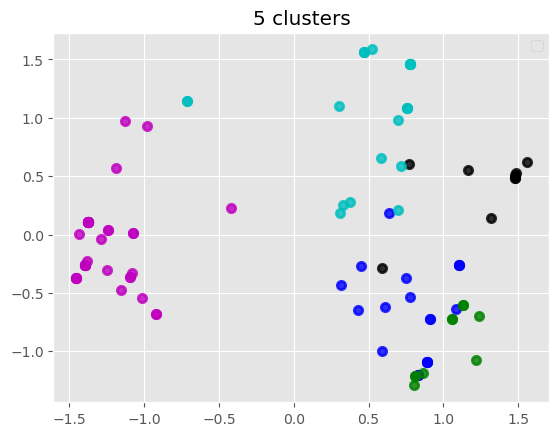

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


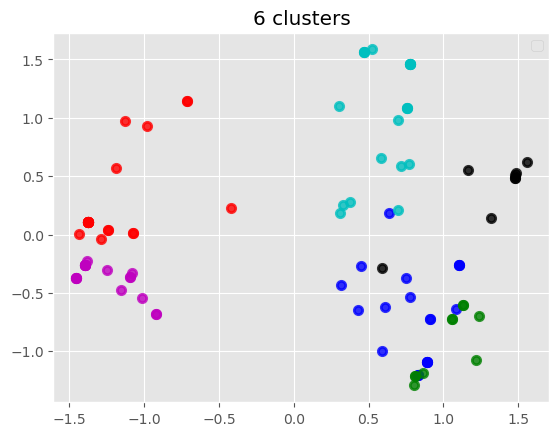

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


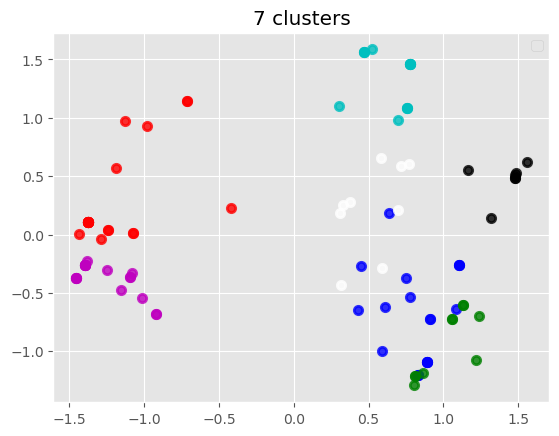

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


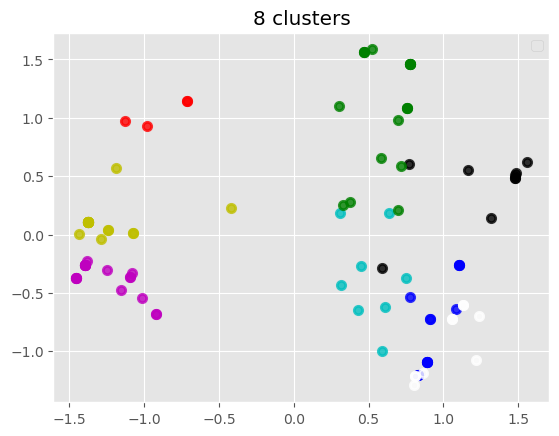

In [180]:

for k in k_values:
    pca = PCA(n_components=2)
    transformed_x = pca.fit_transform(X_train)
    kmeans = KMeans(n_clusters=k, random_state=10, n_init='auto')
    clusters = kmeans.fit_predict(X_train)
    y = kmeans.labels_
    plt . figure ()
    colors = ['k','m', 'b', 'c', 'g', 'r','w','y']
    lw = 2


    for color , i in zip( colors , range(0,k+1)):
        plt . scatter (transformed_x[y == i, 0], transformed_x[y == i, 1], color=color, alpha=.8, lw=lw)
    plt .legend( loc='best', scatterpoints =1)
    plt . title (  f'{k} clusters' )
    plt .show()


In [182]:

features = data.drop(['animal name'], axis=1)
#features include class

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X = data[data.columns[1:-1]]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

#X_train do not include class
#new-clusters  - with class
#clusters - without class


k_values = [5, 6, 7, 8]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(X_train)
    new_clusters = kmeans.fit_predict(scaled_features)
    ari = adjusted_rand_score(new_clusters, clusters)
    ari_real = adjusted_rand_score(new_clusters, data['type'])
    ari_noname = adjusted_rand_score(clusters, data['type'])
    print(f'Adjusted Rand Index (ARI) for 2 clusterings with k={k} clusters: {ari}')
    print(f'Adjusted Rand Index (ARI) for clusters with class for k={k}: {ari_real}')
    print(f'Adjusted Rand Index (ARI) without class for k={k}: {ari_noname}\n')

     

Adjusted Rand Index (ARI) for 2 clusterings with k=5 clusters: 0.8071322664453469
Adjusted Rand Index (ARI) for clusters with class for k=5: 0.8327209890992605
Adjusted Rand Index (ARI) without class for k=5: 0.8293111967418718

Adjusted Rand Index (ARI) for 2 clusterings with k=6 clusters: 0.8901312398656946
Adjusted Rand Index (ARI) for clusters with class for k=6: 0.8551391379235784
Adjusted Rand Index (ARI) without class for k=6: 0.7925931815241782

Adjusted Rand Index (ARI) for 2 clusterings with k=7 clusters: 0.8827089539984517
Adjusted Rand Index (ARI) for clusters with class for k=7: 0.9028314464556075
Adjusted Rand Index (ARI) without class for k=7: 0.8382496019561337

Adjusted Rand Index (ARI) for 2 clusterings with k=8 clusters: 1.0
Adjusted Rand Index (ARI) for clusters with class for k=8: 0.584684119207619
Adjusted Rand Index (ARI) without class for k=8: 0.584684119207619



To compare clusterings we used Adjusted Rand Index. The higher the ARI value, the closer the two clusterings are to each other. 1 indicates perfect agreement of 2 clusterings. We can see that after using 'type' feature, our results changed. The more clusters we add, the more the clusterings are similar. Clusterings are the same when we use 8 clusters, probably because we only have 7 possible values for our class - therefore in case we have to split our data in 8 groups, the 'type' column is useless. Whatsmore, it is clear that if our goal is to predict the type of the animal, using feature 'type' improves our clustering. 

### Exercise 2 

In [187]:
df = pd.read_csv('train.csv')
df.drop(['Name'], 1, inplace=True)
df.head()
df.fillna(0, inplace=True)

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/978195363.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Name'], 1, inplace=True)


In [188]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        #ex. {'Female': 0, 'Male': 1}
        def convert_to_int(val):
            return text_digit_vals[val]
        #this is asking if the column is numerical. If not, it will populate the dict above
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents) #This will give us all unique non-repetitive values
            x = 0
            #if not numerical, converts to list, gets the set, populates the dict with the unique elements and changes to ints
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
        
    return df

In [189]:
df = handle_non_numerical_data(df)
df.drop(['Cabin','SibSp', 'Embarked'],1,inplace=True) 
print(df.head())



   PassengerId  Survived  Pclass  Sex   Age  Parch  Ticket     Fare
0            1         0       3    1  22.0      0     451   7.2500
1            2         1       1    0  38.0      0     224  71.2833
2            3         1       3    0  26.0      0     356   7.9250
3            4         1       1    0  35.0      0     120  53.1000
4            5         0       3    1  35.0      0     484   8.0500


/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/4069116496.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Cabin','SibSp', 'Embarked'],1,inplace=True)


In [192]:
X = np.array(df.drop(['Survived','PassengerId'], 1).astype(float))
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



X_c = np.array(df.drop(['PassengerId'], 1).astype(float))
scaler = MinMaxScaler()
X_c = scaler.fit_transform(X_c)

Y=np.array(df['Survived'])

clf = KMeans(n_clusters=2)
clusters = clf.fit_predict(X)

clf_c = KMeans(n_clusters=2)
clusters_c = clf_c.fit_predict(X_c)

#X - without class
#X_c - with class
#Y - 'Survived' column

ari_c = adjusted_rand_score(Y, clusters_c)
ari = adjusted_rand_score(Y, clusters)
ari_2 = adjusted_rand_score(clusters_c, clusters)
print(f'Adjusted Rand Index (ARI) for 2 clusterings: {ari_2}')
print(f'Adjusted Rand Index (ARI) with class: {ari_c}')
print(f'Adjusted Rand Index (ARI) without class: {ari}')




Adjusted Rand Index (ARI) for 2 clusterings: 0.33040711185639743
Adjusted Rand Index (ARI) with class: 0.9910072207265295
Adjusted Rand Index (ARI) without class: 0.3250882976757677


/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2928880388.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Survived','PassengerId'], 1).astype(float))
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2928880388.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_c = np.array(df.drop(['PassengerId'], 1).astype(float))
/Users/zuzannajarlaczynska/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zuzannajarlaczynska/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wil

### Exercise 3

In [239]:
table = [
    [0.9, 0.1, 0.7],
    [0.6, 0.5,0.3],
    [0.7,0.2,0.4],
    [0.8,0.7, 0.7],
    [0.7, 0.5, 0.3],
]
data = pd.DataFrame(table, columns = ['Telephone', 'Washer','Dishwasher'])
X = data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
print("Centers of clusters")
print(kmeans.cluster_centers_)
print("Labels of clusters")
print(kmeans.labels_)

Centers of clusters
[[0.83333333 0.5        1.        ]
 [0.22222222 0.5        0.08333333]]
Labels of clusters
[0 1 1 0 1]


/Users/zuzannajarlaczynska/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Exercise 4

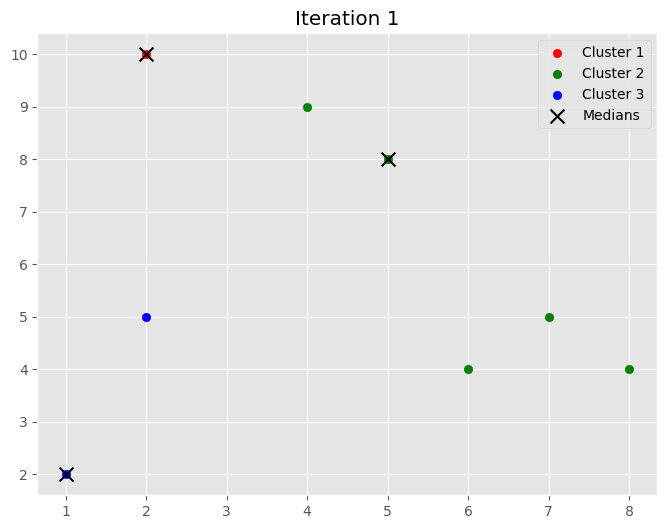

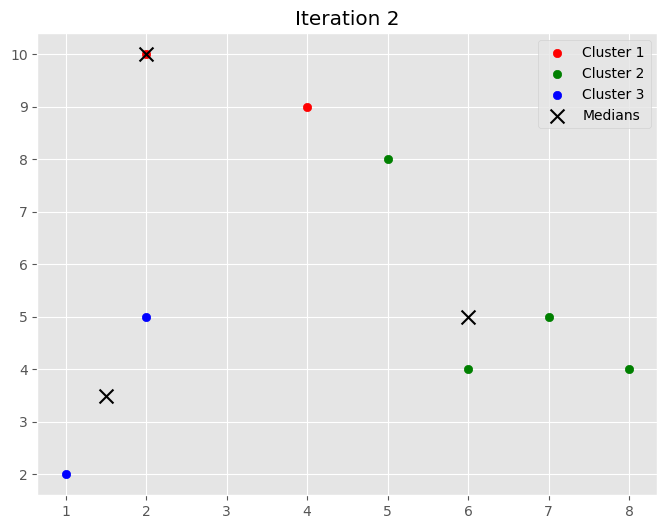

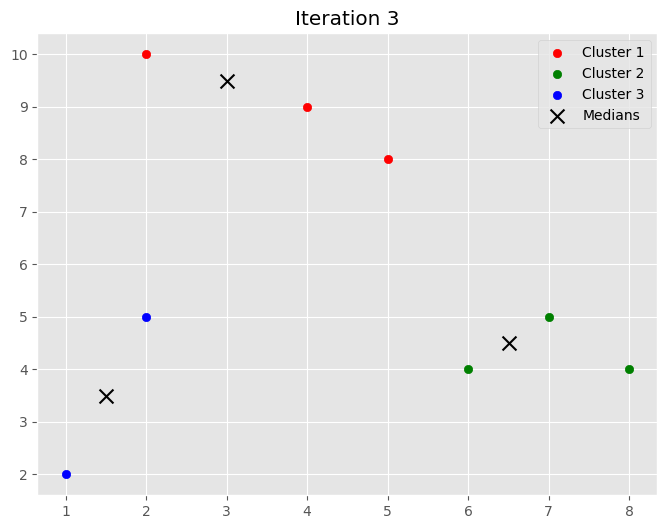

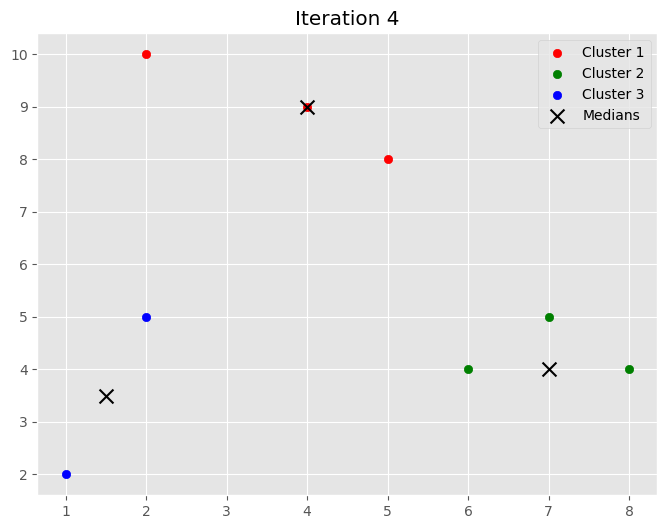

SSE IS:  24.0


In [240]:
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
medians = np.array([[2, 10], [5, 8], [1, 2]])

def manhattan_distance(point1, point2):
    return np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])

def plot_clusters(data, medians, iteration):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

    for i, cluster in enumerate(data):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i + 1}')

    medians = np.array(medians)
    plt.scatter(medians[:, 0], medians[:, 1], marker='x', c='k', s=100, label='Medians')
    plt.title(f'Iteration {iteration + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()

max_iterations = 10

for iteration in range(max_iterations):
    clusters = [[] for _ in range(len(medians))]
    for point in data:
        distances = [manhattan_distance(point, median) for median in medians]
        closest_median_idx = np.argmin(distances)
        clusters[closest_median_idx].append(point)
    
    plot_clusters(clusters, medians, iteration)
    new_medians = []
    for cluster in clusters:
        cluster = np.array(cluster)
        new_median = np.median(cluster, axis=0)
        new_medians.append(new_median)
    
    if np.array_equal(medians, new_medians):
        break
    
    medians = new_medians

sse = sum([sum([manhattan_distance(point, median) ** 2 for point in cluster]) for cluster, median in zip(clusters, medians)])
print("SSE IS: ", sse)

### Exercise 5

Algorithm for single linkage method and 5 number of clusters
[4 4 0 4 4 4 4 0 0 4 4 0 0 1 1 1 0 4 0 4 0 0 4 0 1 0 0 4 4 4 1 4 4 0 0 4 4
 0 0 1 1 0 1 0 4 4 1 4 4 4 4 1 0 1 4 4 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 0 3 0
 4 4 2 1 0 0 0 1 0 0 4 1 0 0 1 0 0 0 0 4 4 0 4 1 4 1 0]
Algorithm for complete linkage method and 5 number of clusters
[0 0 1 0 0 0 0 1 1 0 0 3 1 2 2 2 3 0 1 0 3 3 0 3 4 1 1 0 0 0 4 0 0 3 1 0 0
 3 1 4 4 3 4 3 0 0 2 0 0 0 0 4 1 2 0 0 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 3 2 1
 0 0 1 2 3 3 1 4 1 3 0 2 1 3 4 1 3 1 1 0 0 3 0 4 0 4 3]
Algorithm for ward linkage method and 5 number of clusters
[1 1 2 1 1 1 1 2 2 1 1 3 2 0 0 0 3 1 2 1 3 3 1 3 4 0 0 1 1 1 4 1 1 3 2 1 1
 3 2 4 4 3 4 3 1 1 0 1 1 1 1 4 0 0 1 1 3 3 3 3 2 2 0 1 1 1 1 1 1 1 1 3 0 2
 1 1 0 0 3 3 0 4 2 3 1 0 2 3 4 0 3 0 2 1 1 3 1 4 1 4 3]
Algorithm for average linkage method and 5 number of clusters
[1 1 2 1 1 1 1 2 2 1 1 3 2 0 0 0 3 1 2 1 3 3 1 3 0 2 2 1 1 1 0 1 1 3 2 1 1
 3 2 0 0 3 0 3 1 1 0 1 1 1 1 0 2 0 1 1 3 3 3 3 2 2 2 1 1 1 1 1

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for complete linkage method and 6 number of clusters
[3 3 0 3 3 3 3 0 0 3 3 1 0 2 2 2 1 3 0 5 1 1 3 1 4 0 0 3 3 3 4 3 3 1 0 3 3
 1 0 4 4 1 4 1 3 3 2 3 5 3 3 4 0 2 3 3 1 1 1 1 0 0 0 5 3 3 5 3 3 3 3 1 2 0
 5 5 0 2 1 1 0 4 0 1 3 2 0 1 4 0 1 0 0 3 3 1 3 4 3 4 1]
Algorithm for ward linkage method and 6 number of clusters
[0 0 2 0 0 0 0 2 2 0 0 1 2 5 5 5 1 0 2 0 1 1 0 1 4 3 3 0 0 0 4 0 0 1 2 0 0
 1 2 4 4 1 4 1 0 0 5 0 0 0 0 4 3 5 0 0 1 1 1 1 2 2 3 0 0 0 0 0 0 0 0 1 3 2
 0 0 3 5 1 1 3 4 2 1 0 5 2 1 4 3 1 3 2 0 0 1 0 4 0 4 1]
Algorithm for average linkage method and 6 number of clusters
[1 1 0 1 1 1 1 0 0 1 1 3 0 5 5 5 3 1 0 1 3 3 1 3 2 0 0 1 1 1 2 1 1 3 0 1 1
 3 0 2 2 3 2 3 1 1 5 1 1 1 1 2 0 5 1 1 3 3 3 3 0 0 0 1 1 1 1 1 1 1 1 3 4 0
 1 1 0 5 3 3 0 2 0 3 1 5 0 3 2 0 3 0 0 1 1 3 1 2 1 2 3]


/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 7 number of clusters
[1 1 6 1 1 1 1 6 6 1 1 4 6 0 0 0 4 1 6 1 4 4 1 4 0 2 2 1 1 1 0 1 1 4 6 1 1
 4 6 0 0 4 0 4 1 1 0 1 1 1 1 0 2 0 1 1 4 4 4 4 6 6 2 1 1 1 1 1 1 1 1 4 3 6
 1 1 5 0 4 4 2 0 6 4 1 0 6 4 0 2 4 2 6 1 1 4 1 0 1 0 4]
Algorithm for complete linkage method and 7 number of clusters
[3 3 2 3 3 3 3 2 2 3 3 1 2 0 0 0 1 3 2 5 1 1 3 1 4 6 6 3 3 3 4 3 3 1 2 3 3
 1 2 4 4 1 4 1 3 3 0 3 5 3 3 4 6 0 3 3 1 1 1 1 2 2 6 5 3 3 5 3 3 3 3 1 0 2
 5 5 2 0 1 1 6 4 2 1 3 0 2 1 4 6 1 6 2 3 3 1 3 4 3 4 1]
Algorithm for ward linkage method and 7 number of clusters
[0 2 6 0 0 2 2 6 6 2 0 1 6 5 5 5 1 2 6 0 1 1 2 1 4 3 3 2 2 0 4 2 0 1 6 2 2
 1 6 4 4 1 4 1 0 0 5 0 0 2 0 4 3 5 2 2 1 1 1 1 6 6 3 0 0 2 0 0 0 0 2 1 3 6
 0 0 3 5 1 1 3 4 6 1 2 5 6 1 4 3 1 3 6 2 2 1 2 4 0 4 1]
Algorithm for average linkage method and 7 number of clusters
[0 0 1 0 0 0 0 1 1 0 0 3 1 5 5 5 3 0 1 0 3 3 0 3 2 6 6 0 0 0 2 0 0 3 1 0 0
 3 1 2 2 3 2 3 0 0 5 0 0 0 0 2 6 5 0 0 3 3 3 3 1 1 6 0 0 0 0 0

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 8 number of clusters
[0 0 6 0 0 0 0 6 6 0 0 4 6 1 1 1 4 0 6 0 4 4 0 4 3 2 2 0 0 0 3 0 0 4 6 0 0
 4 6 3 3 4 3 4 0 0 1 0 0 0 0 3 2 1 0 0 4 4 4 4 6 6 2 0 0 0 0 0 0 0 0 4 7 6
 0 0 5 1 4 4 2 3 6 4 0 1 6 4 3 2 4 2 6 0 0 4 0 3 0 3 4]
Algorithm for complete linkage method and 8 number of clusters
[1 1 2 1 1 1 1 2 2 1 1 0 2 3 3 3 0 1 2 5 0 0 1 0 4 6 6 1 1 1 4 1 1 0 2 1 1
 0 2 4 4 0 4 0 1 1 3 1 5 1 1 4 6 3 1 1 0 0 0 0 2 2 6 5 1 1 5 1 1 1 1 0 7 2
 5 5 2 3 0 0 6 4 2 0 1 3 2 0 4 6 0 6 2 1 1 0 1 4 1 4 0]
Algorithm for ward linkage method and 8 number of clusters
[4 2 6 4 4 2 2 6 6 2 4 0 6 5 5 5 0 2 6 7 0 0 2 0 1 3 3 2 2 4 1 2 4 0 6 2 2
 0 6 1 1 0 1 0 4 4 5 4 7 2 4 1 3 5 2 2 0 0 0 0 6 6 3 7 4 2 7 4 4 4 2 0 3 6
 7 7 3 5 0 0 3 1 6 0 2 5 6 0 1 3 0 3 6 2 2 0 2 1 4 1 0]
Algorithm for average linkage method and 8 number of clusters
[7 7 0 7 7 7 7 0 0 7 7 3 0 5 5 5 3 7 0 1 3 3 7 3 2 6 6 7 7 7 2 7 7 3 0 7 7
 3 0 2 2 3 2 3 7 7 5 7 1 7 7 2 6 5 7 7 3 3 3 3 0 0 6 1 7 7 1 7

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 9 number of clusters
[3 3 6 3 3 3 3 6 6 3 3 1 6 0 0 0 1 3 6 3 1 1 3 1 8 2 2 3 3 3 8 3 3 1 6 3 3
 1 6 8 8 1 8 1 3 3 0 3 3 3 3 8 2 0 3 3 1 1 1 1 6 6 2 4 3 3 3 3 3 3 3 1 7 6
 3 3 5 0 1 1 2 8 6 1 3 0 6 1 8 2 1 2 6 3 3 1 3 8 3 8 1]
Algorithm for complete linkage method and 9 number of clusters
[1 1 0 1 1 1 1 0 0 1 1 3 0 8 8 8 3 1 0 5 3 3 1 6 4 2 2 1 1 1 4 1 1 3 0 1 1
 3 0 4 4 3 4 3 1 1 8 1 5 1 1 4 2 8 1 1 6 3 6 3 0 0 2 5 1 1 5 1 1 1 1 6 7 0
 5 5 0 8 3 3 2 4 0 3 1 8 0 6 4 2 6 2 0 1 1 3 1 4 1 4 3]
Algorithm for ward linkage method and 9 number of clusters
[4 0 6 4 4 0 0 6 6 0 4 8 6 5 5 5 2 0 6 7 8 2 0 2 1 3 3 0 0 4 1 0 4 2 6 0 0
 2 6 1 1 2 1 8 4 4 5 4 7 0 4 1 3 5 0 0 2 8 2 8 6 6 3 7 4 0 7 4 4 4 0 2 3 6
 7 7 3 5 2 2 3 1 6 8 0 5 6 2 1 3 2 3 6 0 0 2 0 1 4 1 8]
Algorithm for average linkage method and 9 number of clusters
[3 3 7 3 3 3 3 7 7 3 3 1 7 5 5 5 1 3 7 0 1 1 3 1 2 6 6 3 3 3 2 3 3 1 7 3 3
 1 7 2 2 1 2 1 3 3 5 3 0 3 3 2 6 5 3 3 1 1 1 1 7 7 6 0 3 3 0 3

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see

Algorithm for single linkage method and 10 number of clusters
[3 3 6 3 3 3 3 6 6 3 3 1 6 0 0 0 1 3 6 3 1 1 3 1 8 2 2 3 3 3 8 3 3 1 6 3 3
 1 6 8 8 1 8 1 3 3 0 3 3 3 3 8 2 0 3 3 1 1 1 1 6 6 2 9 3 3 3 3 3 3 3 1 7 6
 3 3 5 4 1 1 2 8 6 1 3 0 6 1 8 2 1 2 6 3 3 1 3 8 3 8 1]
Algorithm for complete linkage method and 10 number of clusters
[0 0 4 0 0 0 0 9 4 0 0 3 4 8 8 8 3 0 4 5 3 3 0 6 1 2 2 0 0 0 1 0 0 3 9 0 0
 3 4 1 1 3 1 3 0 0 8 0 5 0 0 1 2 8 0 0 6 3 6 3 4 4 2 5 0 0 5 0 0 0 0 6 7 9
 5 5 4 8 3 3 2 1 9 3 0 8 4 6 1 2 6 2 4 0 0 3 0 1 0 1 3]
Algorithm for ward linkage method and 10 number of clusters
[4 2 6 4 4 2 2 6 6 2 4 8 6 5 5 5 0 2 6 7 8 0 2 0 1 3 3 9 2 4 1 2 4 0 6 2 9
 0 6 1 1 0 1 8 4 4 5 4 7 9 4 1 3 5 9 2 0 8 0 8 6 6 3 7 4 2 7 4 4 4 2 0 3 6
 7 7 3 5 0 0 3 1 6 8 9 5 6 0 1 3 0 3 6 9 9 0 2 1 4 1 8]
Algorithm for average linkage method and 10 number of clusters
[3 3 7 3 3 3 3 7 7 3 3 1 7 5 5 5 1 3 7 6 1 1 3 1 0 2 2 3 3 3 0 3 3 1 7 3 3
 1 7 0 0 1 0 1 3 3 5 3 6 3 3 0 2 5 3 3 1 1 1 1 7 7 2 9 3 3

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/2139457204.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


MI results:      single  complete      ward   average
0  0.705901  0.906281  0.926748  0.882297
1  0.864824  0.781408  0.952276  0.902360
2  0.935217  0.828424  0.682877  0.950052
3  0.957024  0.823955  0.615013  0.823955
4  0.934211  0.782759  0.545511  0.830872
5  0.930742  0.760423  0.467514  0.827666

ARI results:      single  complete      ward   average
0  0.705901  0.906281  0.926748  0.882297
1  0.864824  0.781408  0.952276  0.902360
2  0.935217  0.828424  0.682877  0.950052
3  0.957024  0.823955  0.615013  0.823955
4  0.934211  0.782759  0.545511  0.830872
5  0.930742  0.760423  0.467514  0.827666



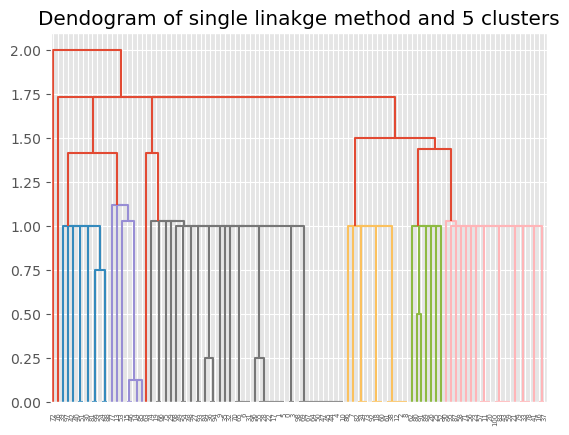

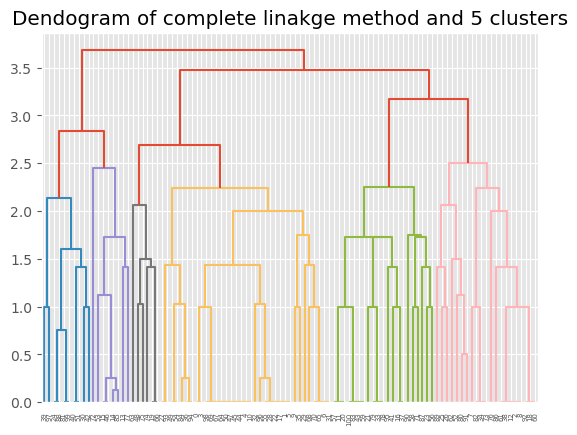

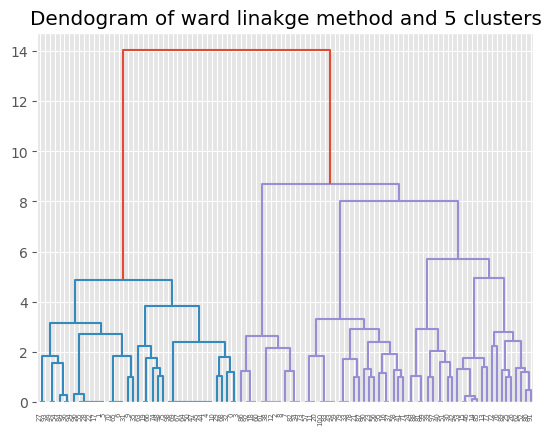

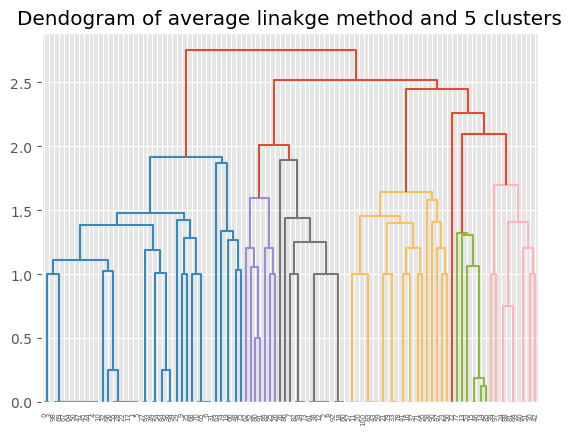

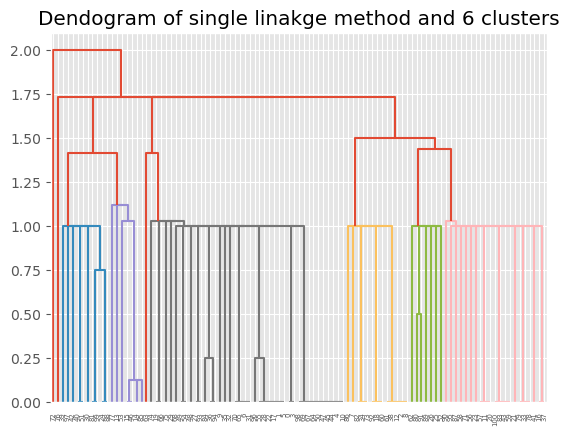

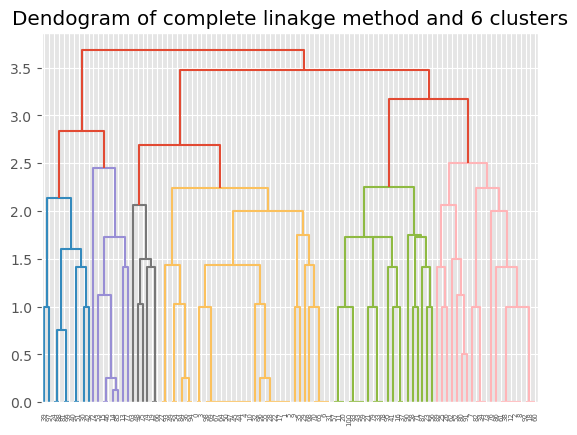

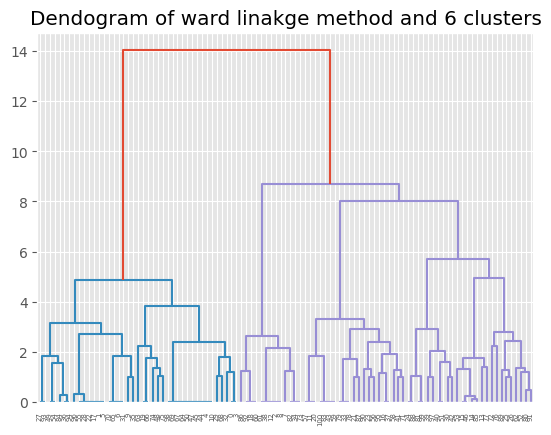

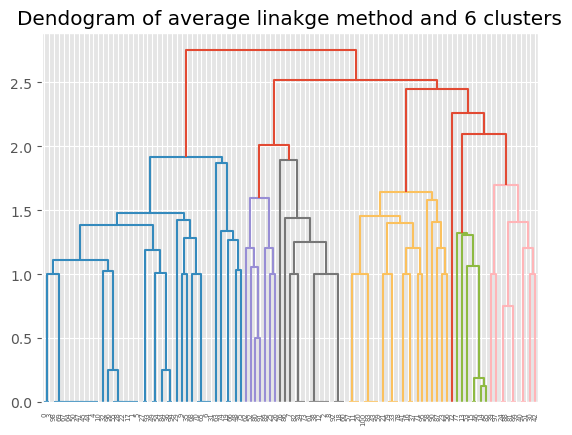

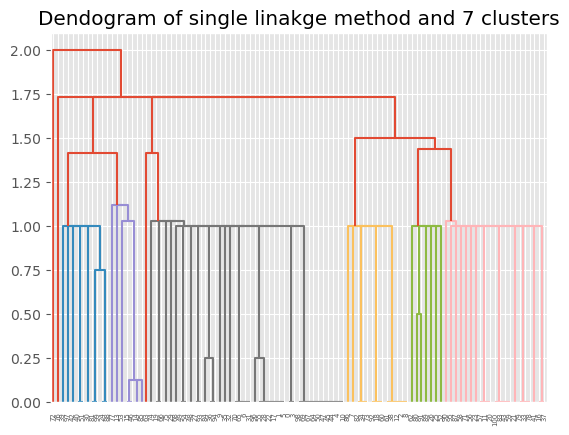

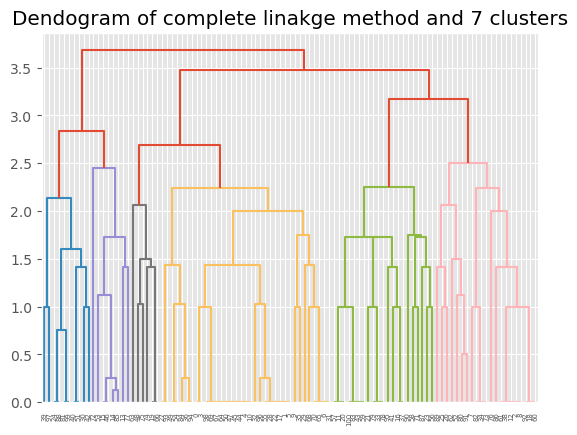

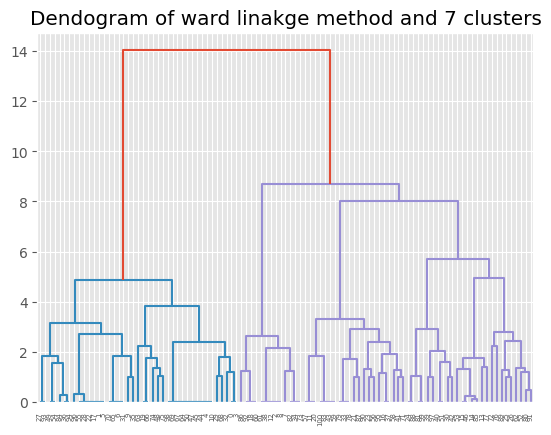

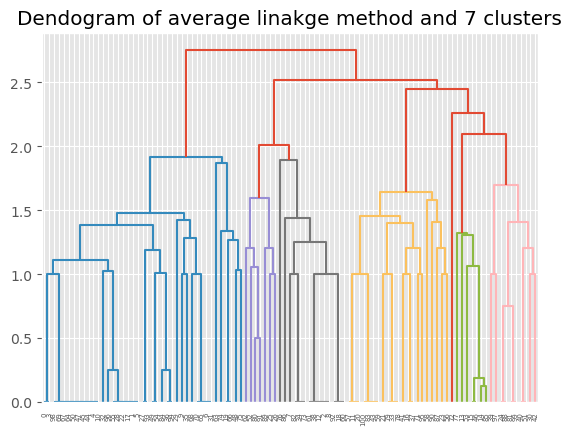

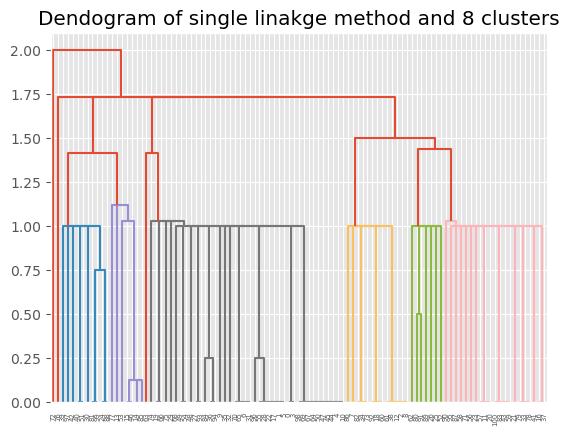

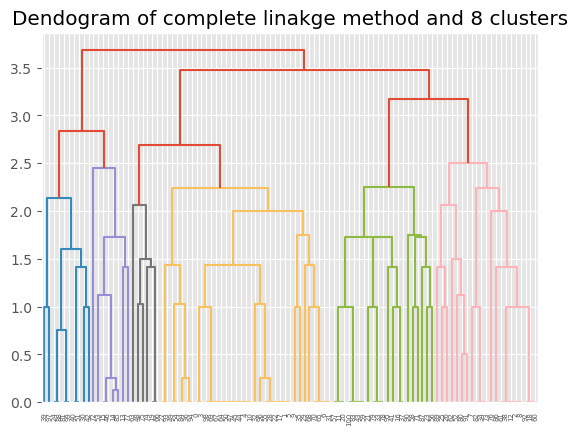

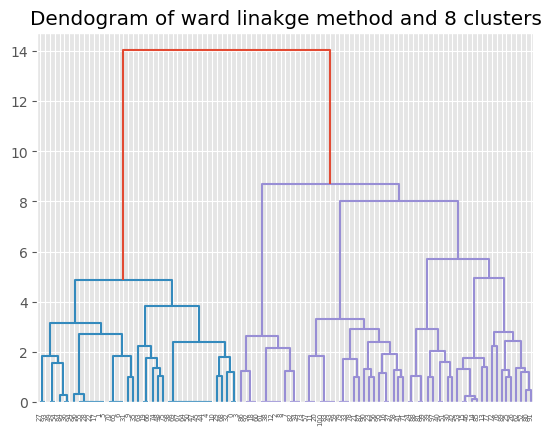

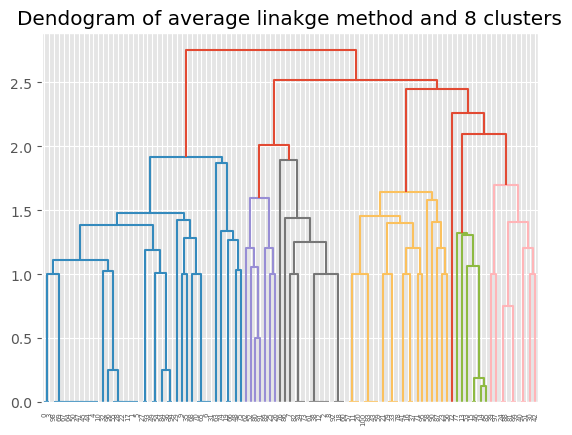

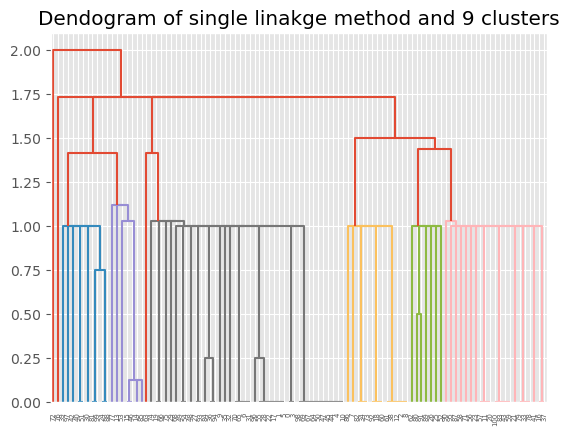

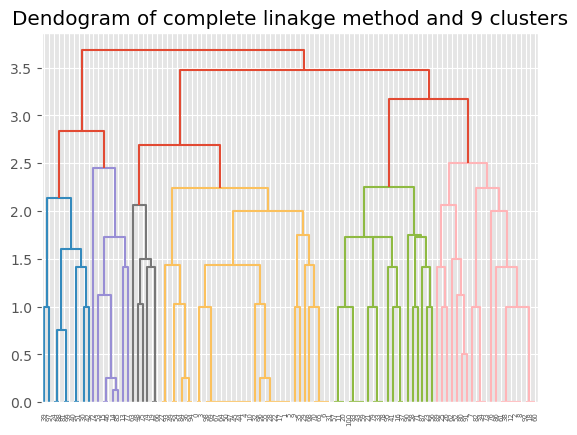

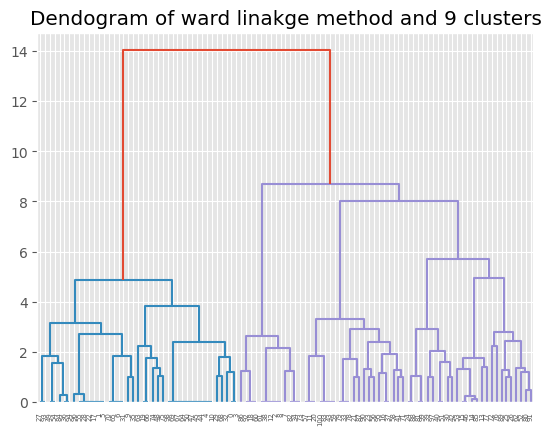

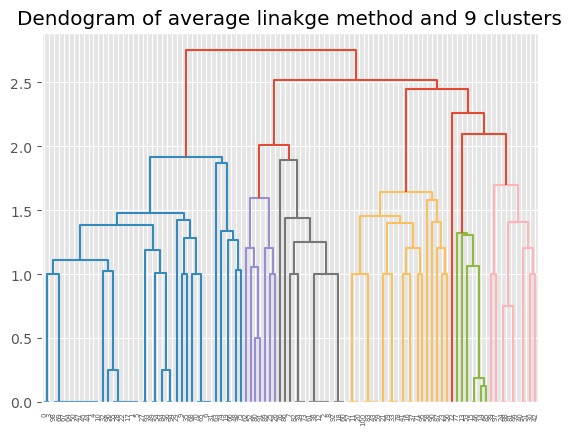

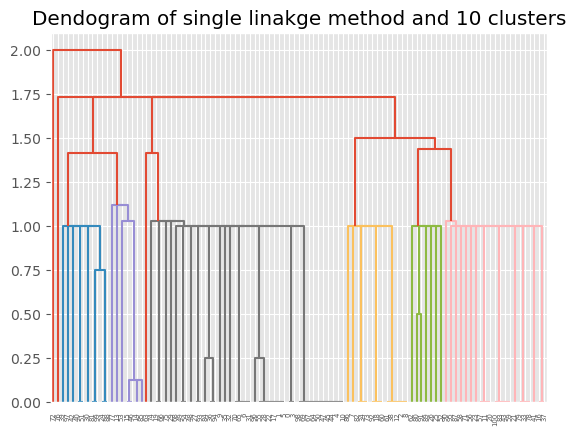

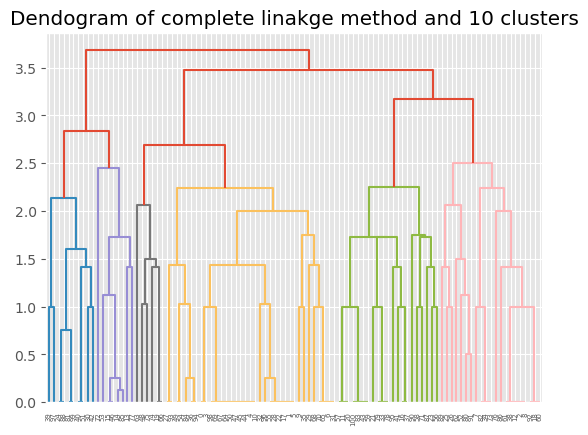

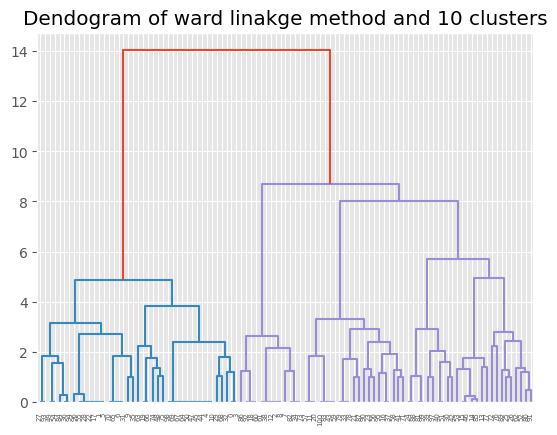

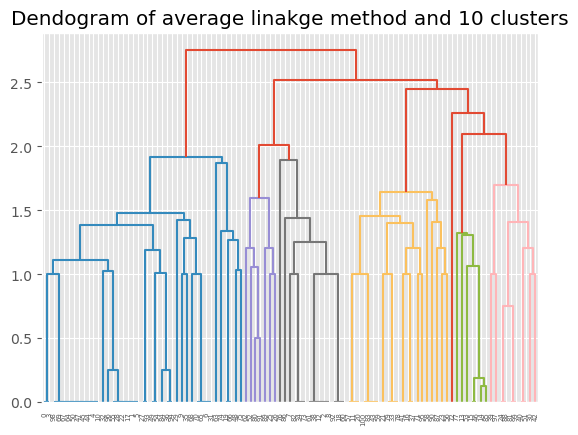

In [231]:

filename = "zoo.data"
col_names = ['animal_nam','hair','feathers','eggs','milk','airbone','aquatic','predator','toothed','backbone','breathes','venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
Zoodata = pd.read_csv(filename,names=col_names)
types = ['single', 'complete', 'ward', 'average']
my_data = Zoodata.drop(['animal_nam', 'type'], axis=1)
Ari_results = pd.DataFrame(columns=types)
Mi_results = pd.DataFrame(columns=types)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(my_data)
for num in range(5,11):
    ari =[]
    mi = []
    for t in types:
        print("Algorithm for "+ t + " linkage method and " + str(num) + " number of clusters")
        cluster = AgglomerativeClustering(n_clusters=num, linkage=t)
        cluster.fit(X_train)
        print(cluster.labels_)
        import scipy.cluster.hierarchy as dnd
        plt.figure()
        plt.title("Dendogram of " + t + " linakge method and " + str(num) + " clusters")
        dend = dnd.dendrogram(dnd.linkage(X_train, method=t))
        ari_num = adjusted_rand_score(Zoodata['type'],cluster.labels_)
        mi_num = mutual_info_score(Zoodata['type'],cluster.labels_)
        ari.append(ari_num)
        mi.append(mi_num)
    Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
    Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)

print(f'MI results: {Mi_results}\n')
print(f'ARI results: {Ari_results}\n')

### Exercise 6

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Name'], 1, inplace=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Cabin','SibSp', 'Embarked'],1,inplace=True) #came back to do this for better accuracy
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PassengerId'], 1).astype(float))


Algorithm for single linkage method and 3 number of clusters
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 2 0 1 0 2 1 2 0 1 0 0 1 0 0 1 1 0 0 0 2
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 2 1 0 1 0 0 1 0 0 0 2 1 0 1 0 0 0 0 0
 2 0 0 0 2 1 0 2 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 2 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1
 0 1 2 0 0 1 0 1 2 1 1 0 0 1 0 0 0 0 0 2 0 0 2 1 2 0 1 0 0 0 1 1 0 1 0 2 0
 0 0 2 0 2 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 1 1 1 1
 1 0 2 0 0 0 0 0 2 1 1 0 2 1 0 1 1 0 0 0 1 0 0 0 2 0 0 2 0 2 1 1 1 0 0 0 0
 0 0 2 1 1 2 0 1 0 2 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 2 0 2 1 0 0 0 1 1 1 2 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 2 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 2 2 0 1 1 0 0 0 0 1 2 0 0 0 0 0 0
 2 0 0 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0 1 1 0 2 2 1 1 0 0 1 0 1 0 0 1 0 0 1
 2 2 1 2 1 2 0 0 0 2 0 2 0 1 1 0 2 0 0 

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 4 number of clusters
[3 1 1 1 3 3 3 3 1 1 1 1 3 3 2 1 3 0 2 1 3 0 1 0 2 1 3 3 1 3 3 1 1 3 3 3 0
 3 2 1 2 2 3 1 1 3 3 1 3 2 3 3 1 1 3 0 1 3 1 3 3 1 3 3 3 0 1 3 1 3 3 2 3 3
 0 3 3 3 0 1 3 0 1 3 1 1 3 3 1 3 3 3 3 3 3 3 3 0 1 3 2 3 3 3 3 3 1 0 3 1 3
 2 3 2 2 3 3 3 3 2 3 3 3 1 3 0 3 0 1 3 3 3 2 1 3 3 1 3 3 3 2 1 1 3 3 3 0 2
 3 3 3 1 3 3 3 3 1 3 3 3 3 1 3 3 3 0 1 2 3 3 3 3 1 3 3 3 3 2 3 3 2 3 3 0 1
 3 1 0 3 3 1 3 1 0 1 1 3 3 1 2 3 3 3 3 0 2 3 0 1 0 3 1 3 3 3 1 1 3 1 3 0 3
 3 3 0 3 0 3 3 2 1 3 3 1 3 2 3 1 3 3 2 1 3 3 3 3 2 1 0 3 3 2 3 3 2 1 1 1 1
 1 3 0 3 3 2 3 3 0 1 1 3 0 1 3 1 1 2 3 3 1 3 3 3 0 3 3 0 3 0 1 1 1 3 2 3 3
 3 2 0 1 1 0 3 1 3 0 1 1 3 1 1 1 2 3 3 1 1 3 1 1 3 3 1 1 3 1 3 1 1 1 1 3 3
 3 1 3 3 1 0 3 0 1 3 3 3 1 1 1 0 3 3 3 3 3 3 3 1 2 1 1 3 3 2 3 3 3 1 1 1 1
 0 3 3 3 2 1 1 3 3 3 1 1 3 1 3 3 3 1 3 1 0 0 3 1 1 3 2 3 3 1 0 3 2 3 2 3 3
 0 3 2 3 3 1 3 0 2 1 1 3 2 3 3 3 2 3 3 1 1 3 0 0 1 1 3 3 1 2 1 3 3 1 3 3 1
 0 0 1 0 1 0 3 3 3 0 3 0 3 1 1 3 0 3 3 

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 5 number of clusters
[3 1 1 1 3 3 3 3 1 1 1 1 3 3 0 1 3 4 0 1 3 4 1 4 0 1 3 3 1 3 3 1 1 3 3 3 4
 3 0 1 0 0 3 1 1 3 3 1 3 0 3 3 1 1 3 4 1 3 1 3 3 1 3 3 3 4 1 3 1 3 3 0 3 3
 4 3 3 3 4 1 3 4 1 3 1 1 3 3 1 3 3 3 3 3 3 3 3 4 1 3 0 3 3 3 3 3 1 4 3 1 3
 0 3 0 0 3 3 3 3 0 3 3 3 1 3 4 3 4 1 3 3 3 0 1 3 3 1 3 3 3 0 1 1 3 3 3 4 0
 3 3 3 1 3 3 3 3 1 3 3 3 3 1 3 3 3 4 1 0 3 3 3 3 1 3 3 3 3 0 3 3 0 3 3 4 1
 3 1 4 3 3 1 3 1 4 1 1 3 3 1 0 3 3 3 3 4 0 3 4 1 4 3 1 3 3 3 1 1 3 1 3 4 3
 3 3 4 3 4 3 3 0 1 3 3 1 3 0 3 1 3 3 0 1 3 3 3 3 0 1 4 3 3 0 3 3 0 1 1 1 1
 1 3 4 3 3 0 3 3 4 1 1 3 4 1 3 1 1 0 3 3 1 3 3 3 4 3 3 4 3 4 1 1 1 3 0 3 3
 3 0 4 1 1 4 3 1 3 4 1 1 3 1 1 1 0 3 3 1 1 3 1 1 3 3 1 1 3 1 3 1 1 1 1 3 3
 3 1 3 3 1 4 3 4 1 3 3 3 1 1 1 4 3 3 3 3 3 3 3 1 0 1 1 3 3 0 3 3 3 1 1 1 1
 4 3 3 3 0 1 1 3 3 3 1 1 3 1 3 3 3 1 3 1 4 4 3 1 1 3 0 3 3 1 4 3 0 3 0 3 3
 4 3 0 3 3 1 3 4 0 1 1 3 0 3 3 3 0 3 3 1 1 3 4 4 1 1 3 3 1 0 1 3 3 1 3 3 1
 4 4 1 4 1 4 3 3 3 4 3 4 3 1 1 3 4 3 3 

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


Algorithm for single linkage method and 6 number of clusters
[3 1 1 1 3 3 3 3 1 1 1 1 3 3 0 1 3 4 0 1 3 4 1 4 0 1 3 3 1 3 3 1 1 3 3 3 4
 3 0 1 0 0 3 1 1 3 3 1 3 0 3 3 1 1 3 4 1 3 1 3 3 1 3 3 3 4 1 3 1 3 3 0 3 3
 4 3 3 3 4 1 3 4 1 3 1 1 3 3 1 3 3 3 3 3 3 3 3 4 1 3 0 3 3 3 3 3 1 4 3 1 3
 0 3 0 0 3 3 3 3 0 3 3 3 1 3 4 3 4 1 3 3 3 0 1 3 3 1 3 3 3 0 1 1 3 3 3 4 0
 3 3 3 1 3 3 3 3 1 3 3 3 3 1 3 3 3 4 1 0 3 3 3 3 1 3 3 3 3 0 3 3 0 3 3 4 1
 3 1 4 3 3 1 3 1 4 1 1 3 3 1 0 3 3 3 3 4 0 3 4 1 4 3 1 3 3 3 1 1 3 1 3 4 3
 3 3 4 3 4 3 3 0 1 3 3 1 3 0 3 1 3 3 0 1 3 3 3 3 0 1 4 3 3 0 3 3 0 1 1 1 1
 1 3 4 3 3 0 3 3 4 1 1 3 4 1 3 1 1 0 3 3 1 3 3 3 4 3 3 4 3 4 1 1 1 3 0 3 3
 3 2 4 1 1 4 3 1 3 4 1 1 3 1 1 1 0 3 3 1 1 3 1 1 3 3 1 1 3 1 3 1 1 1 1 3 3
 3 1 3 3 1 4 3 4 1 3 3 3 1 1 1 4 3 3 3 3 3 3 3 1 0 1 1 3 3 0 3 3 3 1 1 1 1
 4 3 3 3 0 1 1 3 3 3 1 1 3 1 3 3 3 1 3 1 4 4 3 1 1 3 0 3 3 1 4 3 0 3 0 3 3
 4 3 0 3 3 1 3 4 0 1 1 3 0 3 3 3 0 3 3 1 1 3 4 4 1 1 3 3 1 0 1 3 3 1 3 3 1
 4 4 1 4 1 4 3 3 3 4 3 4 3 1 1 3 4 3 3 

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_1126/3290701285.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)


MI results:
      single  complete      ward   average
0  0.872400  0.328255  0.872400  0.994857
1  0.685116  0.587442  0.685116  0.870185
2  0.684069  0.561982  0.441826  0.682944
3  0.683296  0.416928  0.380471  0.681815

ARI results:
      single  complete      ward   average
0  0.872400  0.328255  0.872400  0.994857
1  0.685116  0.587442  0.685116  0.870185
2  0.684069  0.561982  0.441826  0.682944
3  0.683296  0.416928  0.380471  0.681815



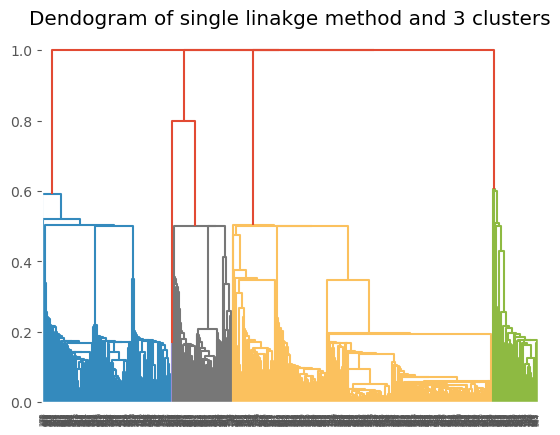

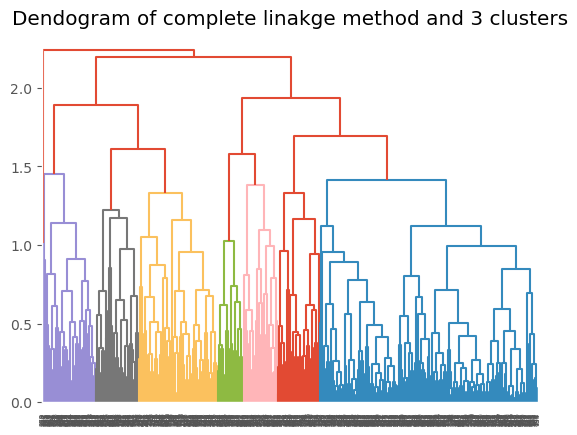

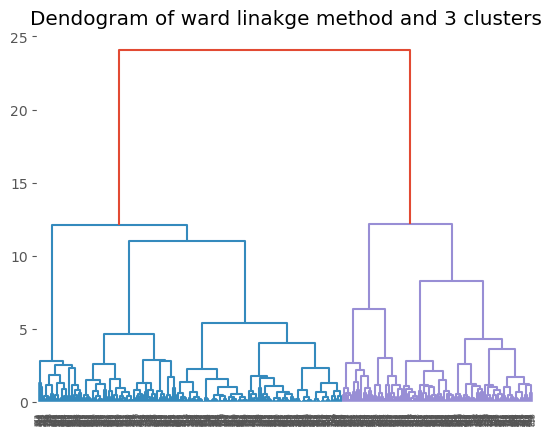

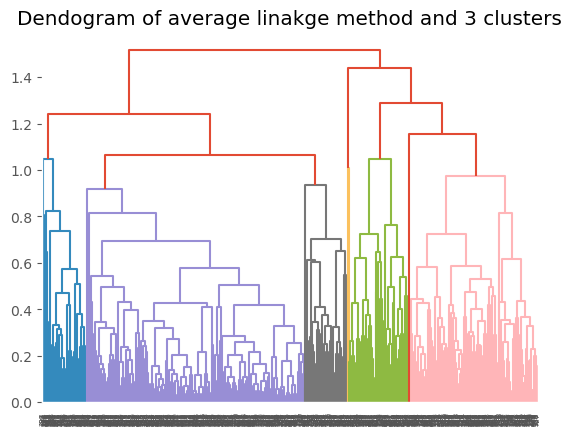

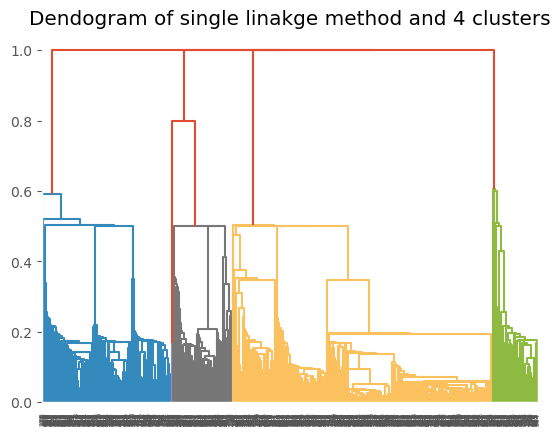

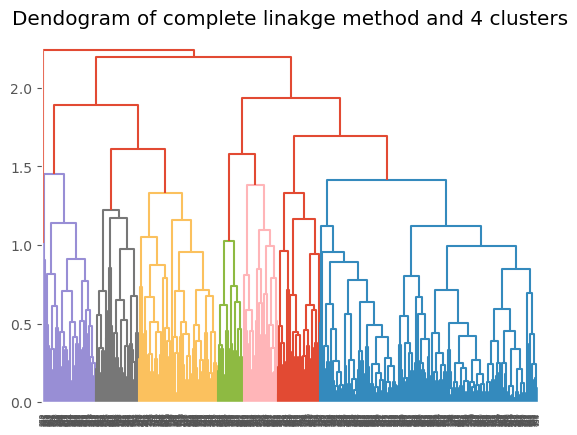

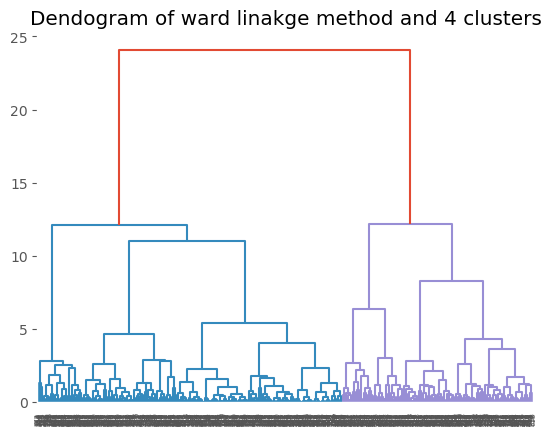

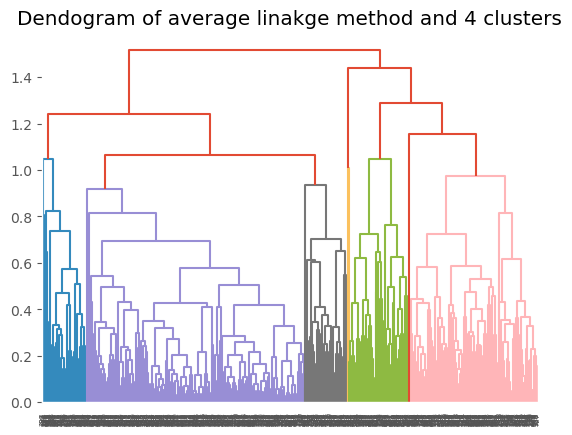

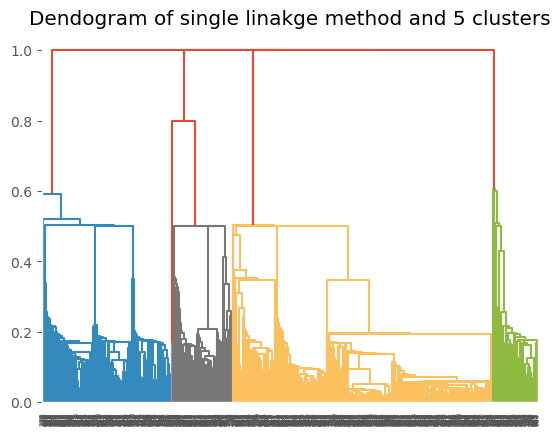

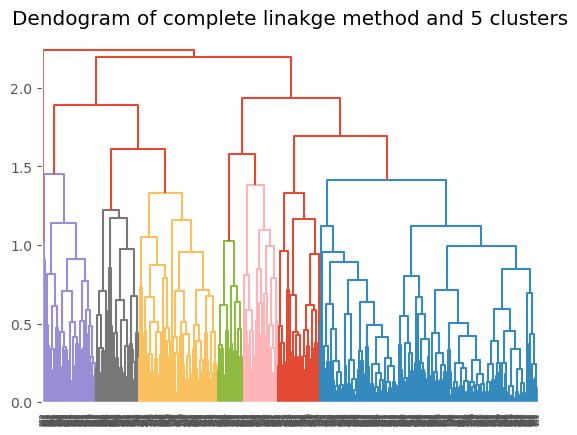

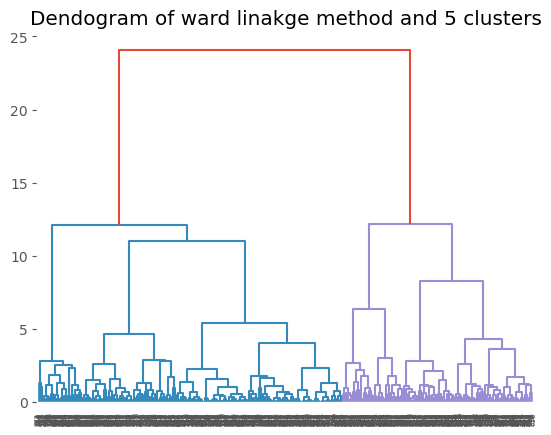

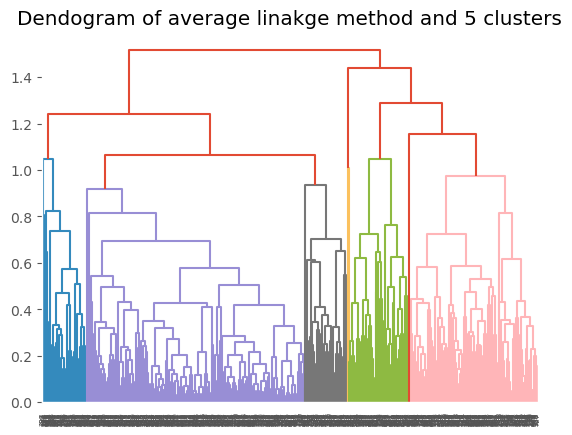

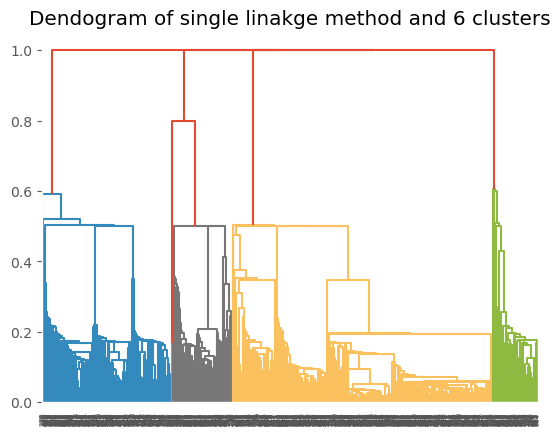

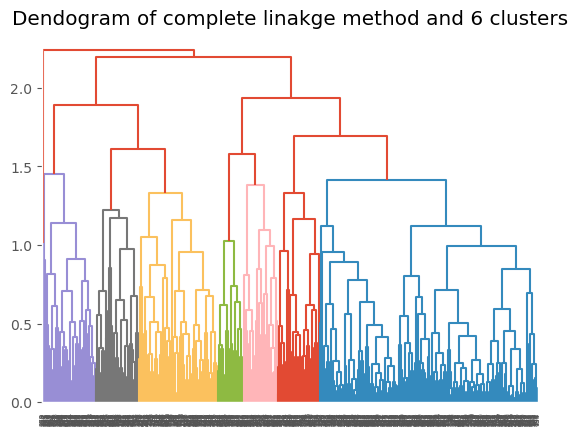

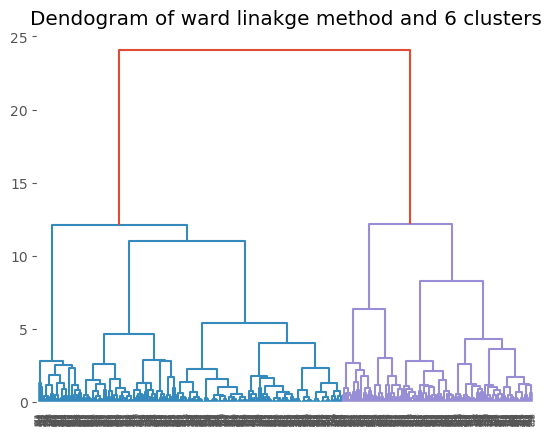

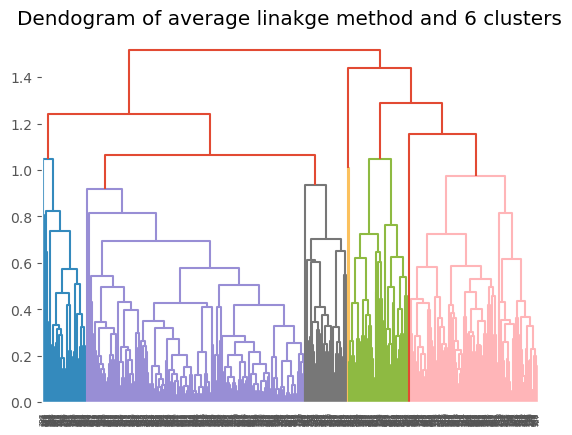

In [238]:
df = pd.read_csv('train.csv')
df.drop(['Name'], 1, inplace=True)
df.head()
df.fillna(0, inplace=True)
#df.info()
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        #ex. {'Female': 0, 'Male': 1}
        def convert_to_int(val):
            return text_digit_vals[val]
        #this is asking if the column is numerical. If not, it will populate the dict above
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents) #This will give us all unique non-repetitive values
            x = 0
            #if not numerical, converts to list, gets the set, populates the dict with the unique elements and changes to ints
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
        
    return df

df = handle_non_numerical_data(df)

df.drop(['Cabin','SibSp', 'Embarked'],1,inplace=True) #came back to do this for better accuracy

#print(df.head())

X = np.array(df.drop(['PassengerId'], 1).astype(float))
X= preprocessing.scale(X)


Y=np.array(df['Survived'])


types = ['single', 'complete', 'ward', 'average']
my_data = X
Ari_results = pd.DataFrame(columns=types)
Mi_results = pd.DataFrame(columns=types)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(my_data)
clusters_num = [3,4,5,6]
for num in clusters_num:
    ari =[]
    mi = []
    for t in types:
        print("Algorithm for "+ t + " linkage method and " + str(num) + " number of clusters")
        cluster = AgglomerativeClustering(n_clusters=num, linkage=t)
        cluster.fit(X_train)
        print(cluster.labels_)
        import scipy.cluster.hierarchy as dnd
        plt.figure()
        plt.title("Dendogram of " + t + " linakge method and " + str(num) + " clusters")
        dend = dnd.dendrogram(dnd.linkage(X_train, method=t))
        ari_num = adjusted_rand_score(df['Survived'],cluster.labels_)
        mi_num = mutual_info_score(df['Survived'],cluster.labels_)
        ari.append(ari_num)
        mi.append(mi_num)
    Mi_results = Mi_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
    Ari_results = Ari_results.append({"single" : ari[0], "complete" : ari[1], "ward": ari[2], "average": ari[3]}, ignore_index=True)
print(f'MI results:\n {Mi_results}\n')
print(f'ARI results:\n {Ari_results}\n')

### Exercise 7 

/Users/zuzannajarlaczynska/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/zuzannajarlaczynska/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Lablels of single algorithm:  [0 0 0 0 1]
Labels of complete algorithm:  [1 1 0 0 0]


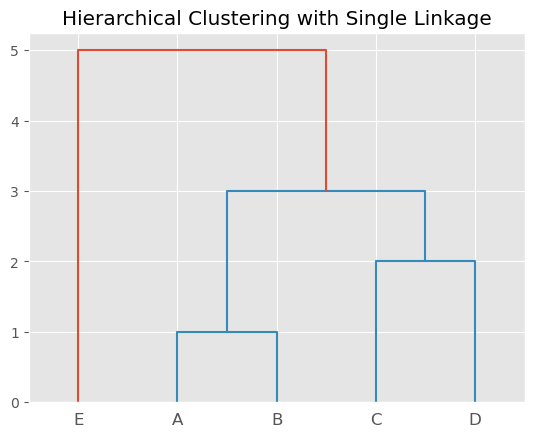

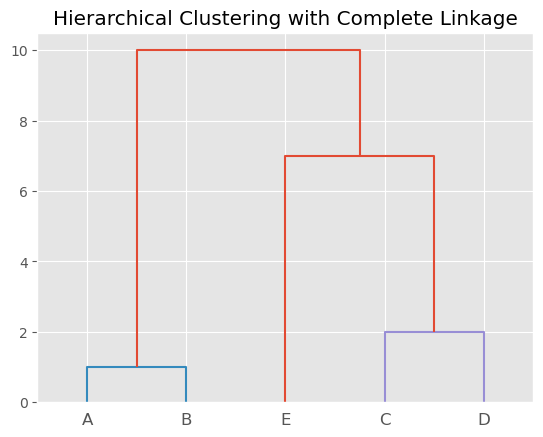

In [241]:
distance = np.array([
    [0,1,9,3,10],
    [1,0,4,8,5],
    [9,4,0,2,7],
    [3,8,2,0,6],
    [10,5,7,6,0]])
columns=['A', 'B', 'C', 'D', 'E']
n = distance.shape[0]
condensed_distance = np.zeros((n * (n - 1) // 2,))
index = 0
for i in range(n):
    for j in range(i + 1, n):
        condensed_distance[index] = distance[i, j]
        index += 1
        
cluster_single = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')
cluster_single.fit(distance)
print("Lablels of single algorithm: ", cluster_single.labels_)
cluster_complete = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
cluster_complete.fit(distance)
print("Labels of complete algorithm: ", cluster_complete.labels_)
import scipy.cluster.hierarchy as dnd
plt.figure()
plt.title("Hierarchical Clustering with Single Linkage")
dend1 = dnd.dendrogram(dnd.linkage(condensed_distance, method='single'),labels=['A', 'B', 'C', 'D','E'])
plt.figure()
plt.title("Hierarchical Clustering with Complete Linkage")
dend2 = dnd.dendrogram(dnd.linkage(condensed_distance, method='complete'), labels=['A', 'B', 'C', 'D','E'])


### Exercise 8 

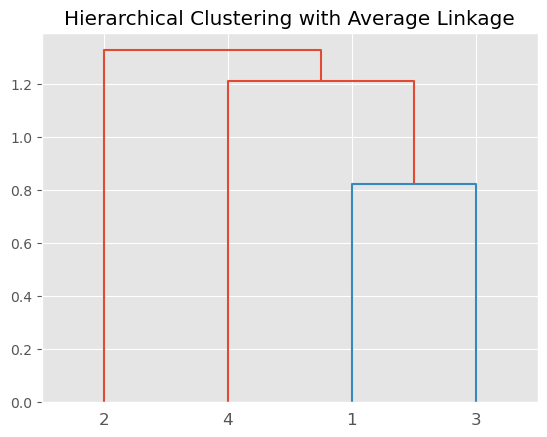

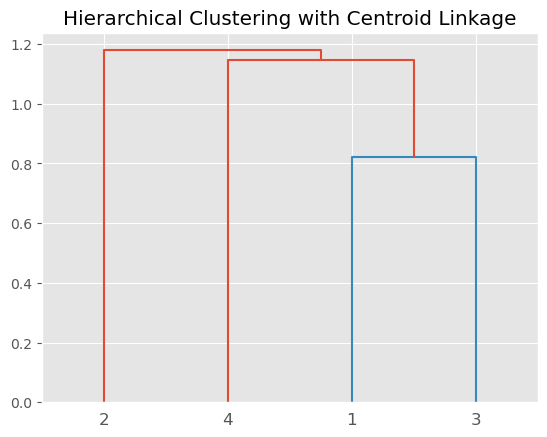

In [242]:
data = pd.DataFrame({
    'Mathematical': [15, 25, 20, 10],
    'Historical': [8, 5, 8, 5],
    'Humanistic': [70, 30, 40, 65]
})

X = data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

cluster_average = AgglomerativeClustering(n_clusters=2, linkage='average', metric='euclidean')
cluster_average.fit(X_train)

import scipy.cluster.hierarchy as dnd
plt.figure()
plt.title("Hierarchical Clustering with Average Linkage")
dend = dnd.dendrogram(dnd.linkage(X_train, method='average'),labels=[1, 2, 3, 4])

# centroid method

from scipy.cluster.hierarchy import dendrogram, linkage
cluster_centroid = linkage(X_train, method='centroid', metric='euclidean')
plt.figure()
dendrogram(cluster_centroid, labels=[1, 2, 3, 4])
plt.title("Hierarchical Clustering with Centroid Linkage")
plt.show()

### Exercise 9

In [222]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Extract features and labels

X = data
y_true = data['target']

#Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [230]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_std)
        unique_clusters = np.unique(clusters)

        
        # Exclude noise points (cluster label -1)
        unique_clusters = unique_clusters[unique_clusters != -1]
        
        # Calculate the number of clusters (excluding noise)
        num_clusters = len(unique_clusters)
        
        # Calculate accuracy as ARI
        ari = adjusted_rand_score(y_true, clusters)
        nmi = normalized_mutual_info_score(y_true, clusters)
        
        print(f"Parameters: eps={eps}, min_samples={min_samples}")
        print(f"Number of clusters: {num_clusters}")
        print(f"ARI: {ari}")
        print(f"NMI: {nmi}")
        print("\n")

Parameters: eps=0.3, min_samples=5
Number of clusters: 3
ARI: 0.08759538435941186
NMI: 0.27830655939065907


Parameters: eps=0.3, min_samples=10
Number of clusters: 0
ARI: 0.0
NMI: 0.0


Parameters: eps=0.3, min_samples=15
Number of clusters: 0
ARI: 0.0
NMI: 0.0


Parameters: eps=0.3, min_samples=20
Number of clusters: 0
ARI: 0.0
NMI: 0.0


Parameters: eps=0.5, min_samples=5
Number of clusters: 4
ARI: 0.5752577919339121
NMI: 0.65224606648146


Parameters: eps=0.5, min_samples=10
Number of clusters: 3
ARI: 0.27919050283369684
NMI: 0.4652293065595071


Parameters: eps=0.5, min_samples=15
Number of clusters: 1
ARI: 0.10448835295587432
NMI: 0.25993283725514116


Parameters: eps=0.5, min_samples=20
Number of clusters: 0
ARI: 0.0
NMI: 0.0


Parameters: eps=0.7, min_samples=5
Number of clusters: 3
ARI: 0.8969774998983197
NMI: 0.8696932991278372


Parameters: eps=0.7, min_samples=10
Number of clusters: 3
ARI: 0.7558164987528874
NMI: 0.7693163819301434


Parameters: eps=0.7, min_samples=15
Numb

### Exercise 10 

In [246]:
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
X= data
dbscan_first = DBSCAN(eps=math.sqrt(2), min_samples=3)
dbscan_first.fit(data)

print("DBSCAN labels with epsilon = sqrt(2) and minPts =3  ",dbscan_first.labels_)
dbscan_second = DBSCAN(eps=math.sqrt(10), min_samples=3)
dbscan_second.fit(data)
print("DBSCAN labels with epsilon = sqrt(10) and minPts =3  ",dbscan_second.labels_)


DBSCAN labels with epsilon = sqrt(2) and minPts =3   [-1 -1  0 -1  0  0 -1 -1]
DBSCAN labels with epsilon = sqrt(10) and minPts =3   [ 1 -1  0  1  0  0 -1  1]
